In [1]:
import numpy as np 
import pandas as pd 
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/awebber00/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("/Users/awebber00/Desktop/Columbia/final_project/airmattress_cleaned.csv")
df.head(10)

,customer_id,review_id,star_rating,review_headline,review_body
0,51982153,R1DZ76NBD2TX55,5,my wife and i had to pick one of these up over...,my wife and i had to pick one of these up over...
1,44662747,R3G4HN08IK8Q5W,5,this is big and comfortable it inflatesdeflat...,this is big and comfortable it inflatesdeflat...
2,17097525,R1S3TBZK71L487,1,horrible it was so comfortable for the first f...,horrible it was so comfortable for the first f...
3,29924839,R9P8YG335IDYV,5,we bought this so our friends kids would have ...,we bought this so our friends kids would have ...
4,46198682,R5VTP1LCQIATH,4,this bed exceeded my expectations in sturdines...,this bed exceeded my expectations in sturdines...
5,11489596,R157632LYK6UT6,1,i wish i could return this item i read almost ...,i wish i could return this item i read almost ...
6,12256364,R2759URB10Q8RD,1,our bad experience is the same as some others ...,our bad experience is the same as some others ...
7,22867429,R238AOC9MSH1XZ,5,grandkids love this so do we it is comfortab...,grandkids love this so do we it is comfortab...
8,40522779,R3BYPZR2ROSYJ5,5,enough said doesnt deflate yet at least and fe...,enough said doesnt deflate yet at least and fe...
9,42989339,RM2WGEJDWJY1I,2,this thing popped after 1 month of every day u...,this thing popped after 1 month of every day u...


In [3]:
df.shape

(4753, 5)

In [4]:
%matplotlib inline

<AxesSubplot:xlabel='star_rating', ylabel='count'>

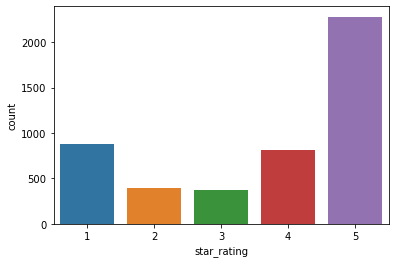

In [5]:
import seaborn as sns
sns.countplot(x='star_rating', data=df)

In [6]:
X = df.iloc[:, 4].values  
y = df.iloc[:, 0].values

In [7]:
processed_dfs = []
 
for df in range(0, len(X)):  
    # Remove all the special characters
    processed_df = re.sub(r'\W', ' ', str(X[df]))
 
    # remove all single characters
    processed_df = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_df)
 
    # Remove single characters from the start
    processed_df = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_df) 
 
    # Substituting multiple spaces with single space
    processed_df = re.sub(r'\s+', ' ', processed_df, flags=re.I)
 
    # Removing prefixed 'b'
    processed_df = re.sub(r'^b\s+', '', processed_df)
 
    # Converting to Lowercase
    processed_df = processed_df.lower()
 
    processed_dfs.append(processed_df)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_dfs).toarray()

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
predictions = text_classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

     1630290       0.00      0.00      0.00       1.0
     3016532       0.00      0.00      0.00       1.0
    26965789       0.00      0.00      0.00       0.0
    27574102       0.00      0.00      0.00       0.0
    30585985       0.00      0.00      0.00       1.0
    32431746       0.00      0.00      0.00       0.0
    35892018       0.00      0.00      0.00       1.0
    40499788       0.00      0.00      0.00       0.0
    43224175       0.00      0.00      0.00       1.0
    52242951       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

0.0


/Users/awebber00/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/awebber00/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/awebber00/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m